In [103]:
import soundfile as sf

In [104]:
sf.read('/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/data/2022/audio/video95.wav')

(array([[0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        ...,
        [0.00164795, 0.00164795],
        [0.0015564 , 0.00158691],
        [0.00149536, 0.00149536]]),
 44100)

In [47]:
x = [x+1 for x in range(20)]
y = [np.exp((x-20)/10) for x in x]

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [82]:
epochs = 20

In [83]:
x = [x for x in range(epochs)]
y = [np.exp((epoch - epochs + 1) / (epochs/4)) for epoch in x]

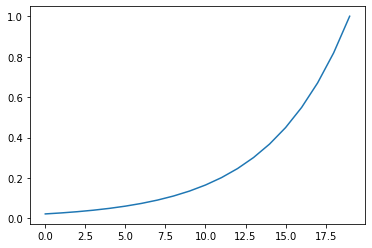

In [84]:
plt.plot(x, y)

In [100]:
epochs = 20

In [101]:
epoch_list = [x for x in range(epochs)]

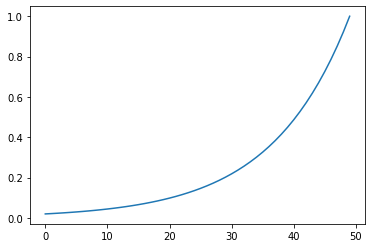

In [97]:
plt.plot(epoch_list, [np.exp((epoch - epochs + 1) / (epochs / 4)) for epoch in epoch_list])

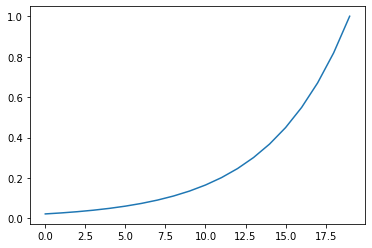

In [102]:
plt.plot(epoch_list, [np.exp((epoch - epochs + 1) / (epochs / 4)) for epoch in epoch_list])

In [85]:
y

[0.0223707718561656,
 0.02732372244729256,
 0.03337326996032608,
 0.04076220397836621,
 0.049787068367863944,
 0.06081006262521797,
 0.07427357821433388,
 0.09071795328941251,
 0.11080315836233387,
 0.1353352832366127,
 0.16529888822158653,
 0.20189651799465538,
 0.2465969639416065,
 0.30119421191220214,
 0.36787944117144233,
 0.44932896411722156,
 0.5488116360940264,
 0.6703200460356393,
 0.8187307530779818,
 1.0]

In [43]:
x = [x+1 for x in range(20)]
y = [np.exp((x-20)/5) for x in x]

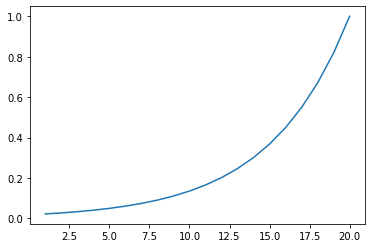

In [44]:
plt.plot(x, y)

In [3]:
import tensorflow as tf
test = tf.keras.models.load_model('/home/euiseokjeong/Desktop/IMLAB/2022_ABAW_imlab/NAS/2022/result/2022_3_20_15_41_54/weight/epoch(7)model_gen_1')

2022-03-20 15:45:58.701681: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


2022-03-20 15:45:58.718740: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 15:45:58.718845: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 15:45:58.719378: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-20 15:45:58.719919: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so retur

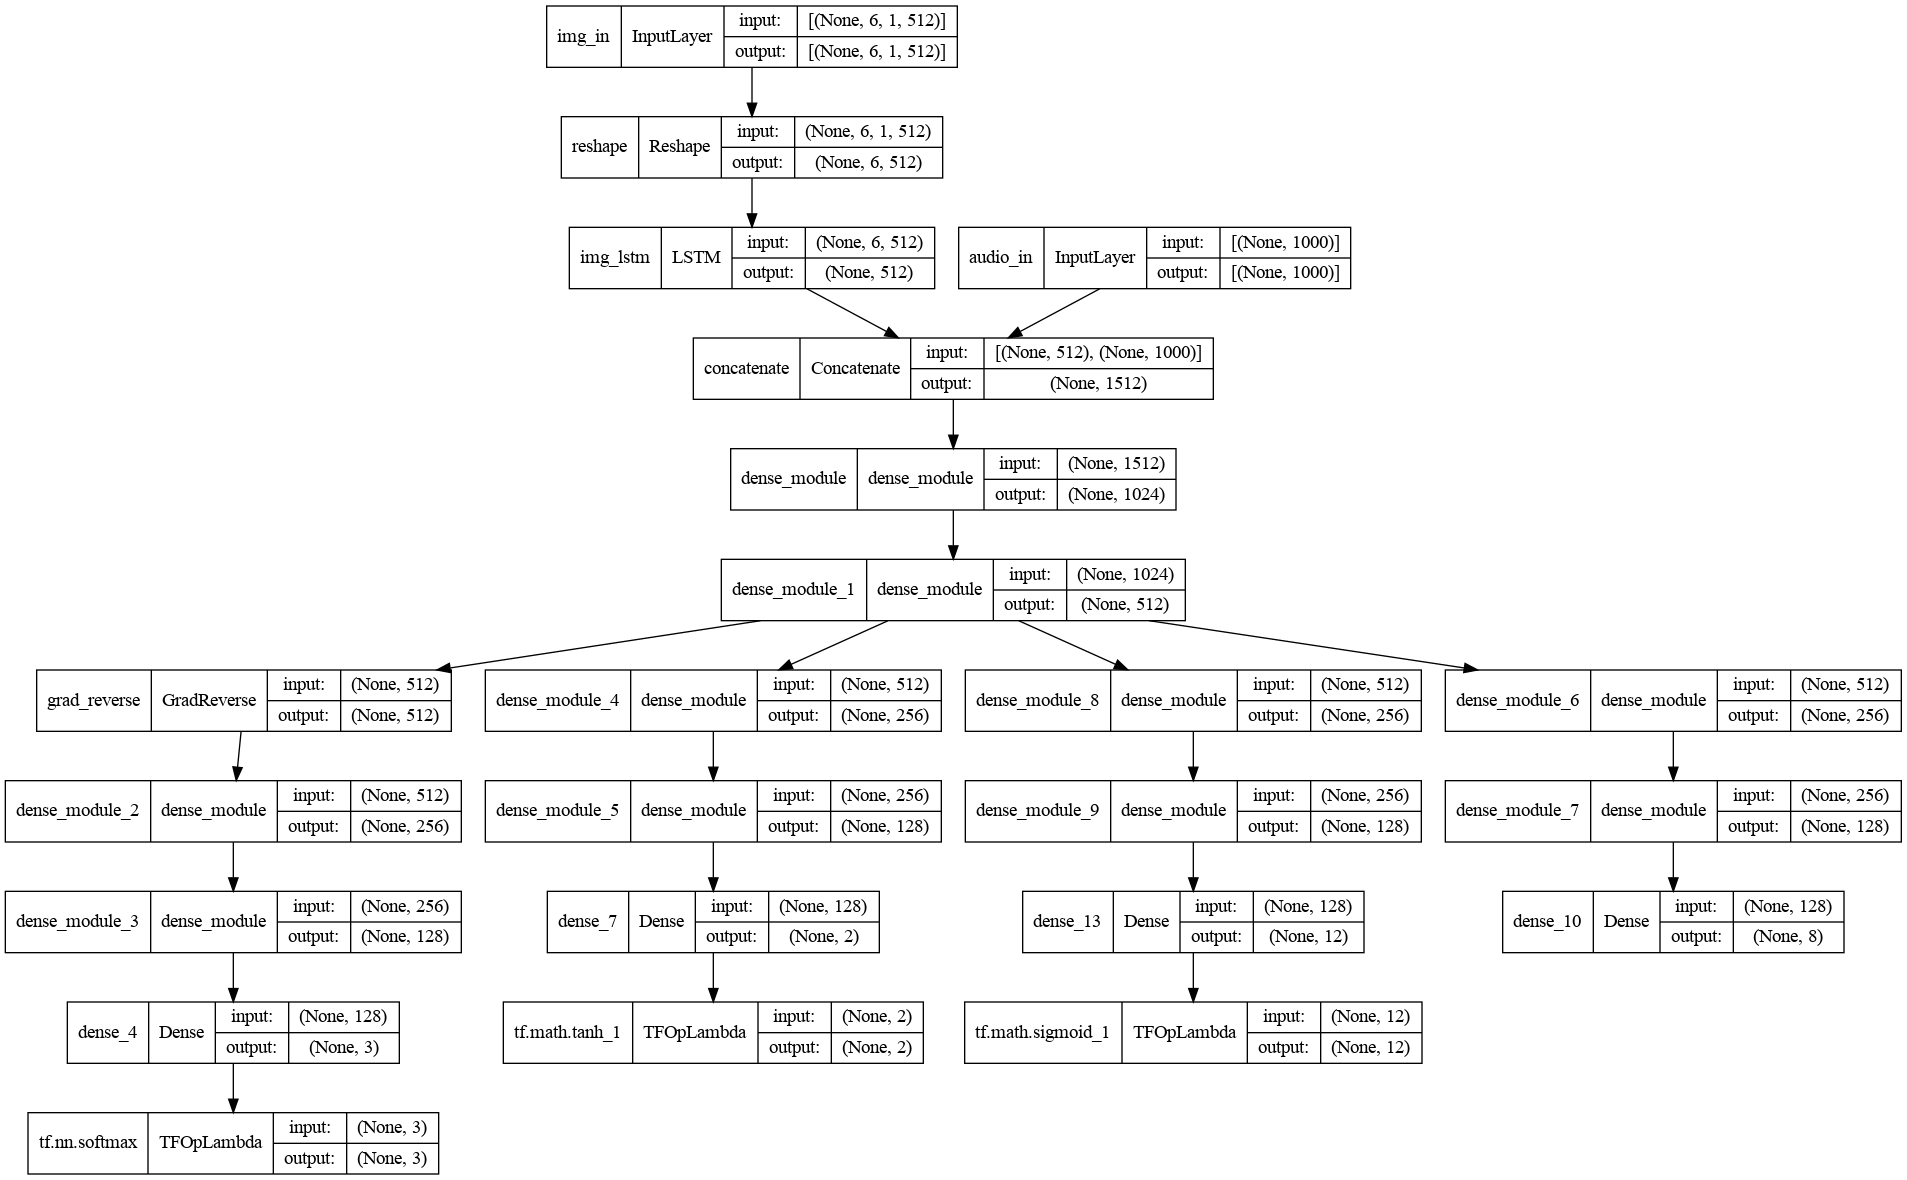

In [6]:
tf.keras.utils.plot_model(test, show_shapes=True)

# get % of feaure/frame_num

In [2]:
import numpy as np
import cv2
import os
import gzip
import pickle
import pandas as pd

In [3]:
data_path = '/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022'
vid_path = os.path.join(data_path, 'video')

In [26]:
img_feature_path = os.path.join(data_path, 'features', 'image_t(2)_s(10)')
img_feature_list = os.listdir(img_feature_path)

aud_feature_path = os.path.join(data_path, 'features','audio')


In [5]:
with gzip.open('/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_train_vid(2)_str(10).pickle','rb') as f:
    train_idx = pickle.load(f)
with gzip.open('/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_valid_vid(2)_str(10).pickle','rb') as f:
    valid_idx = pickle.load(f)

In [29]:
result_df = pd.DataFrame(columns=['video', '%', 'frame','feature'])
for img_name in img_feature_list:
    cnt = 0
    vid_name = img_name.replace('_right','').replace('_left','')
    tmp_vid_path = os.path.join(vid_path, vid_name +'.mp4') if os.path.isfile(os.path.join(vid_path, vid_name +'.mp4')) else os.path.join(vid_path, vid_name +'.avi')
    cap = cv2.VideoCapture(tmp_vid_path)
    frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
#     print(img_name, frame_num)
    tmp_img_feature_path = os.path.join(img_feature_path, img_name)
    tmp_aud_feature_path = os.path.join(aud_feature_path, vid_name)
    for idx in range(frame_num):
        if not os.path.isfile(os.path.join(tmp_img_feature_path, f"{idx}.npy")):
            continue
        if not os.path.isfile(os.path.join(tmp_aud_feature_path, f"{idx}.npy")):
            continue
        cnt += 1
        
    
    # get img_feature num
    
#     img_num = len([x for x in os.listdir(tmp_img_feature_path) if 'npy' in x.split('.')])
    
#     tmp_img_feature_path = os.path.join(img_feature_path, img_name)
#     img_num = len([x for x in os.listdir(tmp_img_feature_path) if 'npy' in x.split('.')])
    
    
#     if not os.path.isdir(tmp_aud_feature_path):
#         aud_num = 0
#     else:
#         aud_num = len([x for x in os.listdir(tmp_aud_feature_path) if 'npy' in x.split('.')])
    # get audio_feature num
#     print(img_num)
#     print(img_name, frame_num, cnt)
    print(f"percentage: {cnt/frame_num*100:.1f}%({cnt}/{frame_num}), video: {img_name}")
    tmp_result_df = pd.DataFrame([[img_name, cnt/frame_num*100, frame_num, cnt]], columns=['video', '%', 'frame','feature'])
    result_df = pd.concat([result_df, tmp_result_df])

percentage: 94.8%(4336/4576), video: 119
percentage: 96.1%(7478/7785), video: video44
percentage: 79.7%(4452/5583), video: 138
percentage: 90.4%(4517/4995), video: 86-24-1920x1080
percentage: 87.4%(2222/2542), video: video48
percentage: 91.4%(5414/5925), video: 204
percentage: 71.1%(738/1038), video: video45_4
percentage: 93.3%(7404/7934), video: 162
percentage: 94.3%(4965/5265), video: 423
percentage: 0.0%(0/294), video: video45_3
percentage: 0.0%(0/6121), video: video49_right
percentage: 89.7%(2613/2913), video: 66-25-1080x1920
percentage: 97.3%(10720/11020), video: video26
percentage: 0.0%(0/73), video: 107-30-640x480
percentage: 91.4%(3180/3480), video: 378
percentage: 90.6%(4894/5402), video: 82-25-854x480
percentage: 89.1%(1820/2042), video: 372
percentage: 88.8%(4577/5153), video: 101-30-1080x1920
percentage: 98.0%(14738/15041), video: 120-30-1280x720
percentage: 81.4%(3930/4830), video: 18-24-1920x1080
percentage: 84.0%(2986/3555), video: 321
percentage: 83.7%(1759/2101), video

percentage: 76.5%(1118/1462), video: 225
percentage: 97.0%(11698/12065), video: 122-60-1920x1080-5
percentage: 92.9%(3570/3841), video: 267
percentage: 93.5%(4319/4619), video: 273
percentage: 90.7%(1963/2165), video: 403
percentage: 93.9%(5390/5743), video: 25-25-600x480
percentage: 90.7%(3996/4404), video: 187
percentage: 92.9%(4564/4912), video: 362
percentage: 78.4%(1935/2468), video: video5_right
percentage: 93.0%(7312/7862), video: 122-60-1920x1080-1
percentage: 24.2%(96/396), video: 28-30-1280x720-2
percentage: 69.7%(474/680), video: 371
percentage: 84.8%(6890/8123), video: 127
percentage: 84.4%(2004/2375), video: 380
percentage: 92.1%(3760/4081), video: 117-25-1920x1080
percentage: 95.3%(6114/6415), video: 176
percentage: 93.8%(4459/4753), video: 262
percentage: 91.6%(3267/3567), video: video35
percentage: 75.7%(5310/7010), video: 242
percentage: 93.2%(4158/4459), video: 32-60-1920x1080
percentage: 84.3%(1612/1912), video: 24-30-1920x1080-1
percentage: 85.5%(5263/6153), video: 

percentage: 88.4%(2115/2393), video: 259
percentage: 47.8%(220/460), video: 133
percentage: 92.6%(3752/4052), video: 185
percentage: 89.7%(2425/2704), video: 373
percentage: 94.2%(4968/5274), video: 20-24-1920x1080
percentage: 94.4%(4313/4568), video: 330
percentage: 92.4%(3815/4127), video: 122
percentage: 90.4%(2867/3172), video: video46
percentage: 87.3%(2939/3366), video: 97-29-1920x1080
percentage: 89.5%(2556/2856), video: 353
percentage: 92.1%(3490/3790), video: 184
percentage: 94.6%(7611/8046), video: video96
percentage: 91.8%(2684/2924), video: 347
percentage: 96.3%(7863/8163), video: 92-24-1920x1080
percentage: 95.8%(7267/7585), video: video14
percentage: 96.1%(7457/7757), video: 34-25-1920x1080
percentage: 88.8%(3442/3875), video: 134-30-1280x720
percentage: 56.5%(473/837), video: 160
percentage: 96.7%(11476/11868), video: video70
percentage: 93.1%(4065/4365), video: 125
percentage: 66.5%(1373/2064), video: video2
percentage: 91.7%(4209/4590), video: 39-25-424x240
percentage:

percentage: 94.0%(4623/4916), video: 393
percentage: 94.4%(4374/4632), video: 339
percentage: 92.0%(2770/3012), video: 238
percentage: 90.1%(3578/3970), video: 230
percentage: 0.0%(0/179), video: video45_7
percentage: 79.2%(2140/2702), video: video83
percentage: 94.7%(4335/4578), video: 305
percentage: 62.4%(512/820), video: video47
percentage: 92.9%(4093/4405), video: 141
percentage: 92.9%(3100/3336), video: 256
percentage: 88.1%(2217/2517), video: 116


In [31]:
result_df.to_csv('./frame_feature_num.csv')

In [9]:
pd.DataFrame([['12212', 212]])

,0,1
0,12212,212


In [15]:
result_df = pd.DataFrame([['21323', 2/100*100, 3, 7]], columns=['video', '%', 'frame','feature'])

In [10]:
result_df = pd.DataFrame(columns=['video', '%', 'frame','feature'])

In [23]:
result_df = pd.concat([result_df, result_df])

In [24]:
result_df

,video,%,frame,feature
0,21323,2.0,3,7
0,21323,2.0,3,7
0,21323,2.0,3,7
0,21323,2.0,3,7


In [3]:
video_path = os.path.join(data_path, 'video')
video_list = os.listdir(video_path)

In [4]:
video_list

['232.mp4',
 'video87.mp4',
 '157.avi',
 '250.mp4',
 '276.mp4',
 '76-30-640x280.mp4',
 'video45_5.mp4',
 '403.mp4',
 '155.avi',
 'video73.mp4',
 '122.avi',
 '322.mp4',
 '204.mp4',
 '4-30-1920x1080.mp4',
 'video22.mp4',
 '120.avi',
 '286.mp4',
 'video45_1.mp4',
 '270.mp4',
 'video41.mp4',
 '72-30-1280x720.mp4',
 'video13.mp4',
 '408.mp4',
 '57-25-426x240.mp4',
 '287.mp4',
 'video36.mp4',
 '267.mp4',
 '303.mp4',
 '376.mp4',
 '312.mp4',
 'video14.mp4',
 '269.mp4',
 '412.mp4',
 '247.mp4',
 '406.mp4',
 '129.avi',
 'video10_1.mp4',
 '244.mp4',
 '69-25-854x480.mp4',
 '224.mp4',
 '433.mp4',
 '136.avi',
 '107.avi',
 '140.avi',
 '383.mp4',
 '194.avi',
 'video53.mp4',
 'video59.mp4',
 '166.avi',
 '11-24-1920x1080.mp4',
 '314.mp4',
 '28-30-1280x720-3.mp4',
 '275.mp4',
 'video86_3.mp4',
 'video66.mp4',
 '141.avi',
 '34-25-1920x1080.mp4',
 'video57.mp4',
 '32-60-1920x1080.mp4',
 '373.mp4',
 '409.mp4',
 '108.avi',
 '158.avi',
 '450.mp4',
 '126-30-1080x1920.mp4',
 '14-30-1920x1080.mp4',
 '209.mp4',
 '

In [5]:
test = 1

In [8]:
x = 1 if test == 1

SyntaxError: invalid syntax (3770833543.py, line 1)

In [7]:
x

1

In [6]:
test_path = '/home/euiseokjeong/Desktop/munus_test'

In [34]:
def minus_name(path, extension, minus_num = -1):
    file_list = os.listdir(path)
    file_list = [int(x.replace(f'.{extension}','')) for x in file_list if extension in x.split('.')]
    file_list.sort()
    for file in file_list:
#         file_name = int(file.split('.')[0])
        source = os.path.join(path, f'{file}.{extension}')
        dest = os.path.join(path, f'{file+minus_num}.{extension}')
        os.rename(source, dest)
minus_name(test_path, 'npy')

In [37]:
from glob import glob
cropped_aligned_path = '/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned'
dir_list = glob(os.path.join(cropped_aligned_path, '*'))
for i, dir in enumerate(dir_list):
    print(i, dir)
    minus_name(dir, 'jpg')

/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/119
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video44
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/138
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/86-24-1920x1080
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video48
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/204
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video45_4
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/162
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/423
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video45_3
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video49_right
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/66-25-1080x1920
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_aligned/video26
/home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/cropped_al

In [24]:
import numpy as np
_8033 = np.load('/home/euiseokjeong/Desktop/munus_test/8033.npy')
_8034 = np.load('/home/euiseokjeong/Desktop/munus_test/8034.npy')

In [30]:
_8033_ = np.load('/home/euiseokjeong/Desktop/munus_test/8033.npy')

In [31]:
_8033_ == _8034

array([[[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True]]])

In [1]:
import cv2
import tensorflow as tf
import numpy as np
from utils import get_metric, get_loss, update_dict, check_dir, save_pickle, check_and_limit_gpu, check_weight
from models import get_model
import time
from dataloader import dataloader
# from config import configs
import os
import shutil
import warnings
from silence_tensorflow import silence_tensorflow
import sys

In [2]:
from config import configs

In [17]:
configs['classifier_layers'] = [256,128]
configs['feature_extractor_layers'] = [1024,512]

In [18]:
model = get_model(configs)
tmp= model(np.zeros((1,6,1,512)), np.zeros((1,1000)))
model.load_weights('/home/euiseokjeong/Desktop/IMLAB/ABAW/result/keep/teacher_test/2022_2_25_20_22_44/weight/best_weight_gen_0.h5')

In [19]:
from dataloader import dataloader
from trainer import Trainer
trainer = Trainer(configs)
silence_tensorflow()
warnings.filterwarnings(action='ignore')
trainer.valid(trainer.valid_dataloader, model, 1)

[INFO] Load existing idx pickle file in /home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_train_vid(2)_str(10).pickle
[INFO] Load existing idx pickle file in /home/euiseokjeong/Desktop/IMLAB/ABAW/data/2022/idx/idx_valid_vid(2)_str(10).pickle

       (01466/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.11/0.50/0.18 time: 258.54sec     (00601/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.10/0.66/0.20 time: 98.56sec      (01250/03203) Validation gen_0 model || valid_metric(VA/EXPR/AU): 0.11/0.52/0.20 time: 216.16sec

KeyboardInterrupt: 

In [5]:
img_input = tf.keras.Input(shape=(6, 1, 512))
audio_input = tf.keras.Input(shape=(1000))
tmp_model =  tf.keras.Model(inputs=[img_input, audio_input], outputs=model.call(img_input, audio_input))


In [6]:
tmp_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1, 512)]  0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1000)]       0           []                               
                                                                                                  
 feature_extractor_1 (feature_e  (None, 256)         5697024     ['input_1[0][0]',                
 xtractor)                                                        'input_2[0][0]']                
                                                                                                  
 classifier_3 (classifier)      (None, 2)            50690       ['feature_extractor_1[0][0]

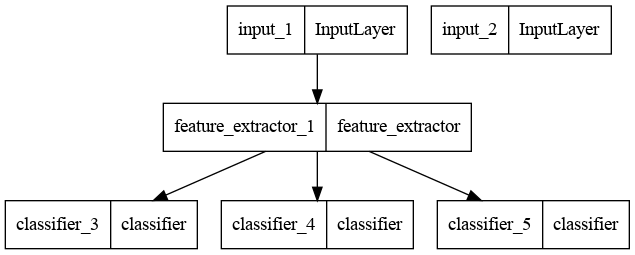

In [7]:
tf.keras.utils.plot_model(tmp_model)

In [8]:
tmp_model.save(os.path.join(os.getcwd(), 'tmp_model.h5'))

NotImplementedError: 